## Project No2 - Concentration Theorems

When writing code, we recommend you to be as modular as possible. For example, if you are running multiple experiments for different choices of parameters, it may be convenient to write a function that does one experiment and then make multiple calls to the same function. Follow the _do not repeat yourself_ rule when writing code! 

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

import matplotlib as mpl

mpl.rcParams['font.size'] = 16

### 0. Setup 

We will consider $X_1, X_2, \ldots, X_n$ a sequence of i.i.d. random variables with mean $\mathbb{E}[X_1] = \mu$. We define the sample mean as 
$$
\bar X_n = \frac{1}{n} \sum_{i=1}^n X_i
$$
The objective of this project is to study the behavior of $\bar X_n$ as $n \rightarrow \infty$. 

### 1. Law of Large Numbers

Here we are going to focus in the convergence in probability and almost surely of the sample mean of i.i.d. random variables. Remember that a sequence of random variables $Y_1, Y_2, \ldots$ converges in probability to a random variable $Y$ if for every $\epsilon > 0$ we have 
$$
\lim_{n \rightarrow \infty} \mathbb P \left( | Y_n - Y | > \epsilon \right) = 0
$$
The **weak law of large numbers** states 

> The sample mean $\bar X_n$ converges in probability to $\mu$.

The **strong law of large numbers** states a more strict sense in which this convergence happens

> The sample mean $\bar X_n$ converges almost surely to $\mu$. 

Let's see how these two behave numerically.

#### 1.1. Gaussian case

Consider the simple case where $X_i \sim N(0,1)$. Compute the sample mean for increasing values of $n$ and show how the sample mean converges to $0$. To do this, you can simply show a plot of the sample mean as a function of $n$. 

***Tip:*** You can compute the sample mean of a normal random variable by simply doing
```python
n = 100
one_sample_mean = np.mean(np.random.normal(loc=0.0, scale=1.0, size=n))
```
The same works if you want to compute a total of `n_sim` sample means:
```python
n = 100
n_sim = 500
many_sample_means = np.mean(np.random.normal(loc=0.0, scale=1.0, size=(n, n_sim)), axis=0)
```

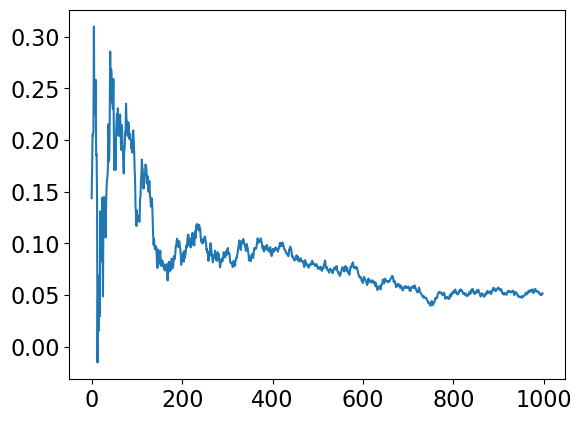

In [22]:
sample_means = []
sample = np.random.normal(loc=0.0, scale=1.0, size=1000)
# TO DO CELL
for n in range (2, 1000):
    #n = 100
    sample_means.append(np.mean(sample[0:n]))
    
mpl.pyplot.plot(sample_means)

#### 1.2. Beta distribution

Now, repeat the same experiment but for a Beta distribution with parameters of your choice. Remember that the mean of a Beta distribution with parameters $a$ and $b$ is $a / (a+b)$. 

For this section, it is important that you compute the sample mean as you increase the value of $n$ *for the same realization of the random variables $X_i$*. To do this, first sample all the values of $X_1, X_2, \ldots, X_{n_{max}}$ just one time and then compute the partial averages $\bar X_n$ for different values of $n \leq n_{max}$. 

Make this plot is logarithmic scale for both axes. This is how your solution should look like. If you kernel dies when running the simulations, try reducing the total number of samples.

<img src="solution_1_2.png" alt="Solution" />

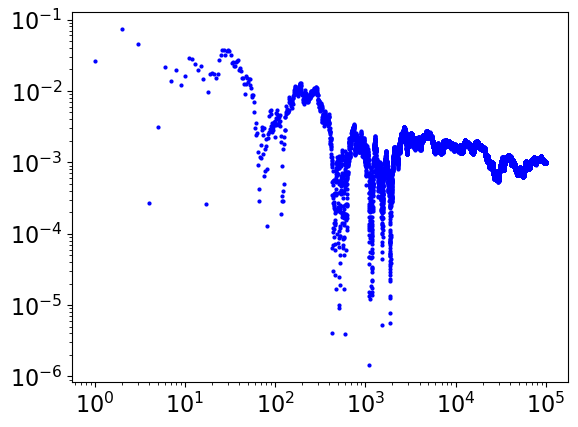

In [23]:
# TO DO CELL
a = 10
b = 5
n_max = 100000
sample_means = []
sample = np.random.beta(a, b, n_max)
mu = (a / (a + b))
for n in range(1,n_max):
    sample_means.append(abs(np.mean(sample[0:n]) - mu))
mpl.pyplot.plot(sample_means, 'bo', markersize=2)
mpl.pyplot.yscale('log')
mpl.pyplot.xscale('log')

**To Discuss:** When doing this calculations, what time of convergence are we studying? almost surely or in probability? 

**To Discuss:** Can you identify the general trend in the previous plot? Can you give meaning the low peaks in the plot? 

We are studying almost surely convergence, because we are computing the difference in the actual mean and the sampled mean and seenig that as n grows larger, the difference goes to 0. We are looking at the plot as the sequence goes to 0. If we used multiple different samples and plotted multiple curves, then we would be studying in probability convergence. Although, almost surely convergence implies in probability so we are studying both essentially.

The general trend is that the difference grows smaller overtime. The low peaks will be due to converting  to a log scale for such small values. The values are oscillating around 0, but sometimes that get so close to 0 that the log blows up. It indicates that the sample mean is getting closer to the true value.

#### 1.3. Compute the probability

Now, instead of evaluating the value of $\bar X_n$, compute the probability $\mathbb P \left( | \bar X_n | > \epsilon \right)$ for different values of $n$ and $\epsilon$ and plot the result as a function of $n$. What do you observe? See the next item for an example of the solution for this problem.

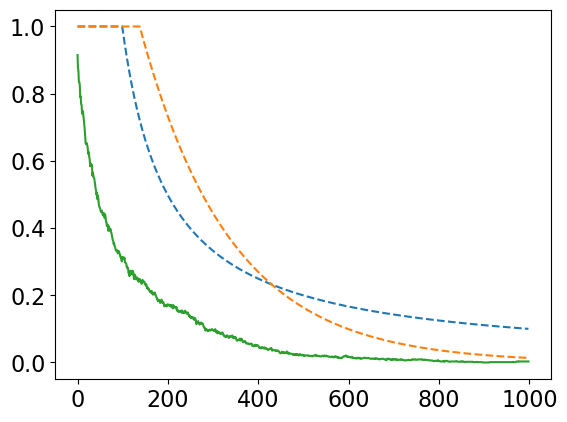

In [24]:
import math
n_max = 1000
mu = 0
samples = np.random.normal(loc=0.0, scale=1.0, size=(1000, n_max))

sample_diff = []

chevychev_bound = []
chernoff_bound = []
epsilon = 0.1

    
for n in range(1, n_max):
    
    # Create the chernoff bound
    if 2 * math.e ** ((-n * epsilon ** (2))/2) < 1:
        chernoff_bound.append(2 * np.e ** ((-n * epsilon ** (2))/2))
    else:
        chernoff_bound.append(1)
    
    # Create the Chevychev bound
    if 1 / (n * (epsilon ** 2)) < 1:
        chevychev_bound.append(1 / (n * (epsilon ** 2) ))
    else:
        chevychev_bound.append(1)
        
    sample_means = []
    for sample in samples:
        sample_means.append(abs(np.mean(sample[0:n]) - mu) > epsilon)
    sample_diff.append(np.mean(sample_means))
        

mpl.pyplot.plot(chevychev_bound, '--')
mpl.pyplot.plot(chernoff_bound, '--')
mpl.pyplot.plot(sample_diff)

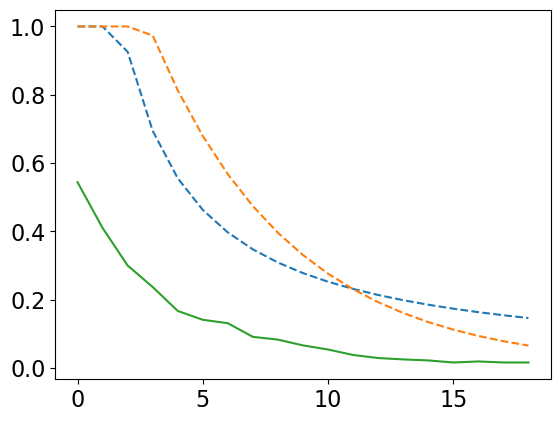

In [25]:
# N = 100, epsilon = 0.6

import math
n_max = 20
mu = 0
samples = np.random.normal(loc=0.0, scale=1.0, size=(1000, n_max))

sample_diff = []

chevychev_bound = []
chernoff_bound = []
epsilon = 0.6

    
for n in range(1, n_max):
    
    # Create the chernoff bound
    if 2 * math.e ** ((-n * epsilon ** (2))/2) < 1:
        chernoff_bound.append(2 * np.e ** ((-n * epsilon ** (2))/2))
    else:
        chernoff_bound.append(1)
    
    # Create the Chevychev bound
    if 1 / (n * (epsilon ** 2)) < 1:
        chevychev_bound.append(1 / (n * (epsilon ** 2) ))
    else:
        chevychev_bound.append(1)
        
    sample_means = []
    for sample in samples:
        sample_means.append(abs(np.mean(sample[0:n]) - mu) > epsilon)
    sample_diff.append(np.mean(sample_means))
        

mpl.pyplot.plot(chevychev_bound, '--')
mpl.pyplot.plot(chernoff_bound, '--')
mpl.pyplot.plot(sample_diff)

The difference will always be below the bounds of course. Additionally, the Chernoff bound can be a better upper bound for larger values of n. In all the observed cases, the difference tends towards 0.

#### 1.4. Concentration bounds

Repeat the same plot that in the last item and show how it compares with the upper bound obtain from using Chebyshev's inequality
$$
\mathbb P \left( | \bar X_n | > \epsilon \right) \leq \frac{1}{n \epsilon^2}
$$
and the Chernoff bound
$$
\mathbb P \left( | \bar X_n | > \epsilon \right) \leq 2 \exp \left( - \frac{\epsilon^2 n}{2} \right)
$$
At the end of the day, you should obtain something like this

<img src="solution_1_34.png" alt="Solution" />


Proof using Chebyshev's inequality:
$$
\mathbb P \left( ( \bar X_n - \mu )^2 > \epsilon^2 \right) \leq \frac{\mathbb E[(\bar X_n - \mu )^2]}{\epsilon^2}
$$

$$
=\frac{\mathbb V[\bar X_n]}{\epsilon^2}
$$

$$
=\frac{\frac{1}{n}}{\epsilon^2}
$$

$$
\mathbb P \left( | \bar X_n - \mu | > \epsilon \right) \leq \frac{1}{n \epsilon^2}
$$



### 2. Central Limit theorem 

Let's first state one more time the Central Limit Theorem

> Consider $X_1, X_2, \ldots, X_n$ a sequence of i.i.d. random variables with mean $\mathbb{E}[X_1] = \mu$ and finite variance $\mathbb{V}ar[X_1] = \sigma^2$. If call 
$$
\bar X_n = \frac{1}{n} \sum_{i=1}^n X_i
$$
the sample mean, then 
$$
\sqrt{n} \frac{\bar X_n - \mu}{\sigma}
$$
converges in distribution to the standard Normal distribution $N(0,1)$.



#### 2.1. Continuous case

Pick a continuous random variable with bounded second moment and show that the central limit theorem holds numerically. Sample the sample mean $\bar X_n$ for various numbers of $n$ and show that $\sqrt{n}(\bar X_n - \mu) / \sigma$ converges to the standard normal distribution.

This is how the solution should look like for the mean of Beta distributions and a total of 10000 simulations. 

<img src="solution_2_1.png" alt="Solution" />

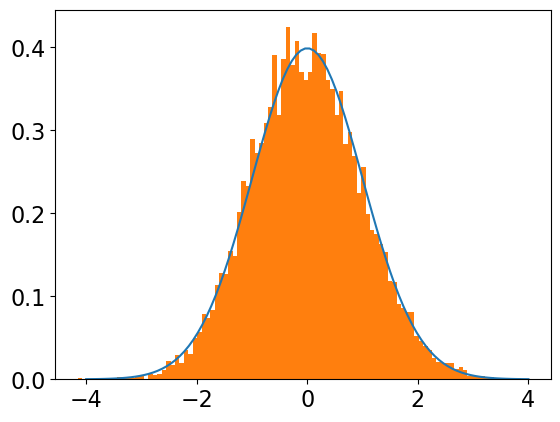

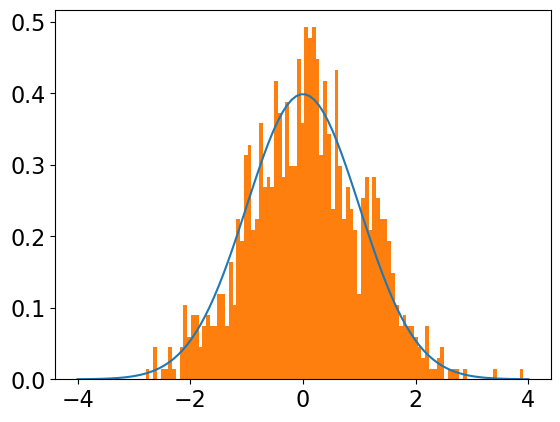

In [26]:
# Example: Exponential distribution
import scipy

# generate sample and give proper scaling
distribution = []
n = 1000
rate = 1/5
for sample in range(10000):
    exp_sample = np.random.exponential(rate, n)
    exp_mean = np.mean(exp_sample)
    distribution.append(np.sqrt(n) * (exp_mean - rate) / np.sqrt(( (rate * rate))))

# PLot the true standard normal and the histogram
x = np.linspace(-4, 4, 100)
y = scipy.stats.norm.pdf(x, 0, 1)
mpl.pyplot.plot(x, y)
mpl.pyplot.hist(distribution, bins = 100, density = True)
mpl.pyplot.show()

# Generate sample and give proper scaling
distribution = []
n = 1000
rate = 1/5
for sample in range(1000):
    exp_sample = np.random.exponential(rate, n)
    exp_mean = np.mean(exp_sample)
    distribution.append(np.sqrt(n) * (exp_mean - rate) / np.sqrt(( (rate * rate))))

# PLot the true standard normal and the histogram
x = np.linspace(-4, 4, 100)
y = scipy.stats.norm.pdf(x, 0, 1)
mpl.pyplot.plot(x, y)
mpl.pyplot.hist(distribution, bins = 100, density = True)
mpl.pyplot.show()

We can see that the sample mean of the exponential distribution with the proper scaling tends towards the standard normal, but the approximation is better for a larger n (the bottom histogram looks less like a standard normal).

#### 2.2. Discrete case

Repeat the experiment but now with a discrete random variable. When plotting the histogram, be careful on how you define the bins. 


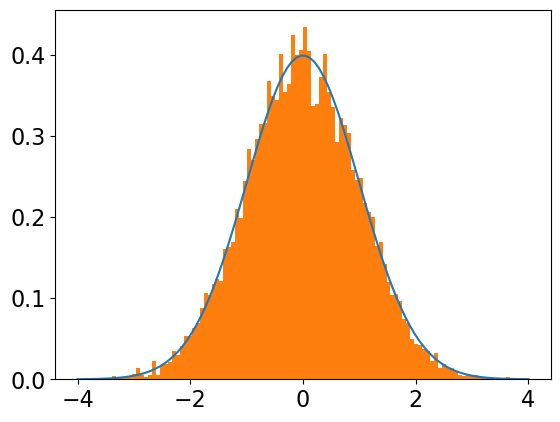

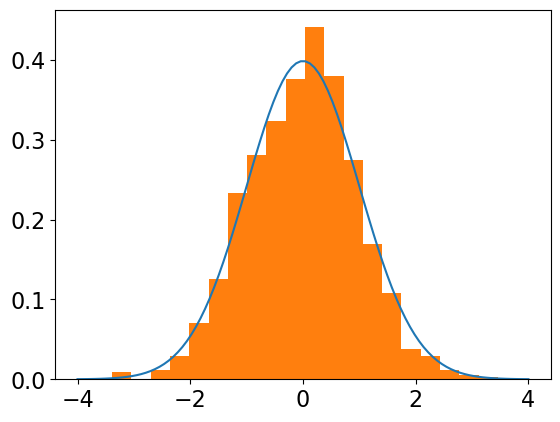

In [27]:
# Example: Poisson distribution
distribution = []
n = 1000
lambda_param = 20
for sample in range(10000):
    poisson_sample = np.random.poisson(lambda_param, n)
    poisson_sample_mean = np.mean(poisson_sample)
    distribution.append(np.sqrt(n) * (poisson_sample_mean - lambda_param) / np.sqrt(lambda_param))

# PLot the true standard normal and the histogram
x = np.linspace(-4, 4, 100)
y = scipy.stats.norm.pdf(x, 0, 1)
mpl.pyplot.plot(x, y)
mpl.pyplot.hist(distribution, bins = 100, density = True)
mpl.pyplot.show()

distribution = []
n = 1000
lambda_param = 20
for sample in range(1000):
    poisson_sample = np.random.poisson(lambda_param, n)
    poisson_sample_mean = np.mean(poisson_sample)
    distribution.append(np.sqrt(n) * (poisson_sample_mean - lambda_param) / np.sqrt(lambda_param))

# PLot the true standard normal and the histogram
x = np.linspace(-4, 4, 100)
y = scipy.stats.norm.pdf(x, 0, 1)
mpl.pyplot.plot(x, y)
mpl.pyplot.hist(distribution, bins = 20, density = True)
mpl.pyplot.show()

The results are similar for the discrete case. The distribution will start to look like a standard normal distribution, but requires larger values of n to be a better approximation.

#### 2.3. [Optional] Distribution without second moment

Consider now a distribution with defined mean without finite second moment. In principle, the central limit theorem does not apply for this case. Generate a simulation of the sample mean for a distribution with these properties and try to understand the behavior of the scaled sample mean as $n$ increases. You may find interesting the reading about [stable distributions](https://en.wikipedia.org/wiki/Stable_distribution).

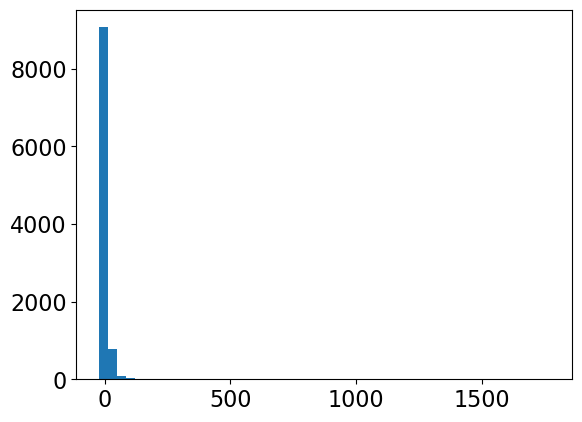

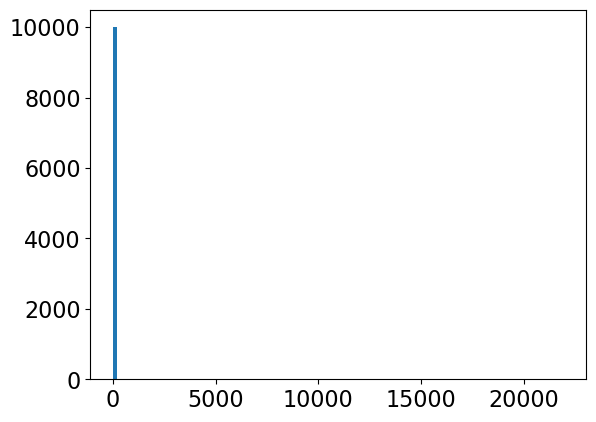

In [28]:
# Example: Pareto distribution
distribution = []
n = 1000
alpha = 1.5
pareto_mean = 1 / (alpha - 1)
for sample in range(10000):
    pareto_sample = np.random.pareto(alpha, n)
    pareto_sample_mean = np.mean(pareto_sample)
    distribution.append(np.sqrt(n) * (pareto_sample_mean - pareto_mean))

mpl.pyplot.hist(distribution, bins = 50)
mpl.pyplot.show()

# Example: Pareto distribution
distribution = []
n = 10
alpha = 1.5
pareto_mean = 1 / (alpha - 1)
for sample in range(10000):
    pareto_sample = np.random.pareto(alpha, n)
    pareto_sample_mean = np.mean(pareto_sample)
    distribution.append(np.sqrt(n) * (pareto_sample_mean - pareto_mean))

mpl.pyplot.hist(distribution, bins = 100)
mpl.pyplot.show()



We can see that as n gets larger the plot will have more variance as expected. However, it will always have some finite variance given that we cannot represent infinite variance on computers. But the distribution clearly does not converge to the standard normal.

### Contribution statement

Please include a list of the students you work with along this project (including yourself). Include both names and GitHub usernames of the people you collaborated with. Maximum of three persons per group. 
- Member No1: Phudish
- Member No2: 
- Member No3: